In [31]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
%cd data/AWSTests/
%ls

/Users/Tim/Documents/GitHub/weave_convolution/data/AWSTests
FullRun30Epochc4_4xlarge/
FullRun60Epochsc4_8xlarge/
Procedure for Launching EC2 Instnace with weave.txt
SingleEpocht2/
SingleFullRunc4_4xlarge/
single_run_c4_8x_large/


# Loads Data


In [34]:
runs = ['run1','run2']
full_data = {}
for run in runs:
    os.chdir(run)
    with open(run + '.json') as f:
        run_data = json.load(f)
    num_epochs = run_data["num_epochs"]
    for num_filters in [32, 16, 8, 4]:
        for num_stack in [4, 2, 1]:
            file_name = '_'
            file_name = file_name.join([str(num_filters),str(num_stack),str(num_epochs)])
            with open(file_name+'.json') as f:
                full_data[(num_filters,num_stack,num_epochs)] = json.load(f)
                full_data[(num_filters,num_stack,num_epochs)]['val_acc'].insert(0,.10)
    os.chdir('..')
            
    


# Acc vs Epoch Plots

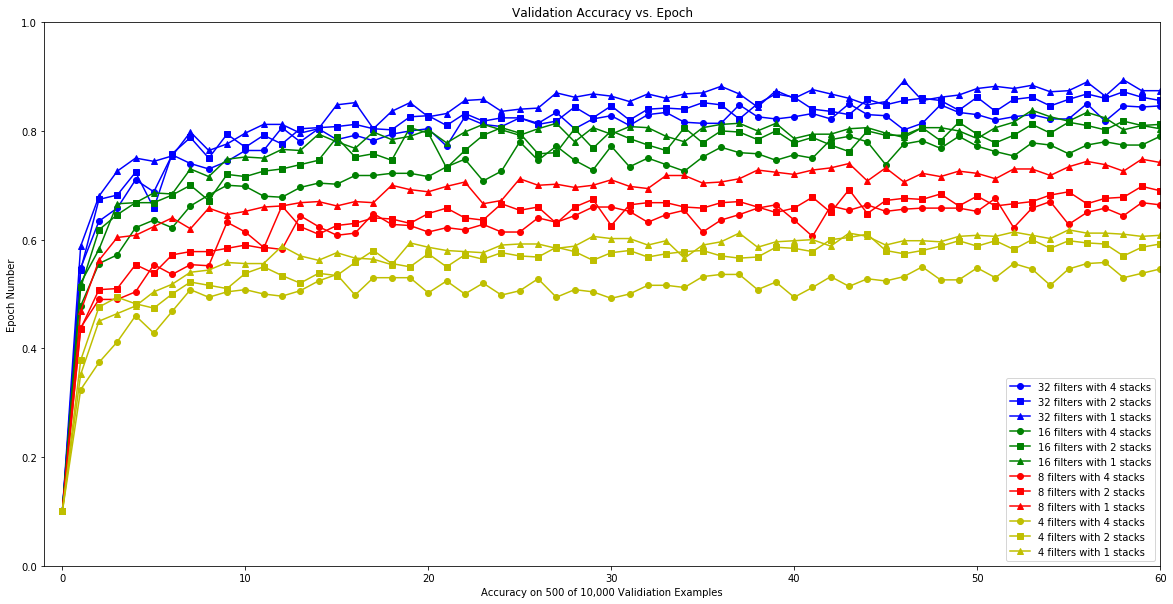

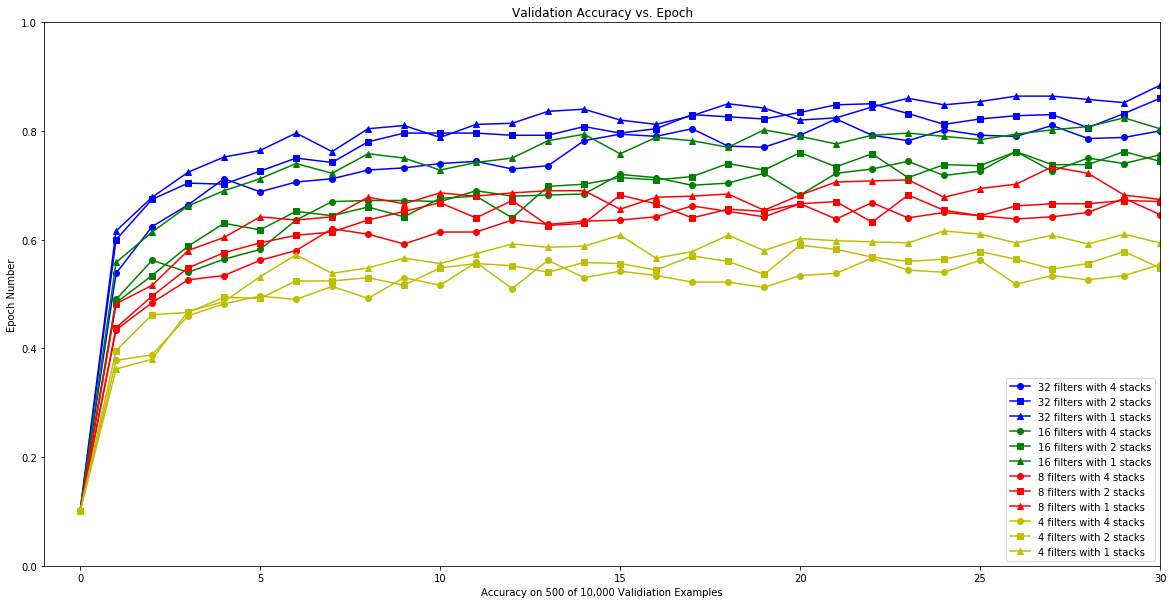

In [43]:
runs = [60, 30]
filters = [32, 16, 8, 4]
stacks = [4, 2, 1]
colors = ['b', 'g', 'r', 'y']
markers = ['o','s','^']
for run in runs:
    plt.figure(figsize=(20,10))
    plt.ylim((0,1))
    plt.xlim((-1,run))
    plt.title('Validation Accuracy vs. Epoch')
    plt.xlabel('Accuracy on 500 of 10,000 Validiation Examples')
    plt.ylabel('Epoch Number')
    for i in range(len(filters)):
        for j in range(len(stacks)):
            num_filters = filters[i]
            num_stack = stacks[j]
            
            
            data = (num_filters,num_stack,run)
            run_data = full_data[(num_filters,num_stack,run)]
            
            lbl = ' '.join([str(num_filters), 'filters', 'with', str(num_stack), 'stacks'])
            line_adjustment = ''.join([colors[i],markers[j],'-'])
            
            
            plt.plot(run_data['val_acc'], line_adjustment, label = lbl)
    plt.legend()
    plt.show()

In [4]:
with open('FullRun60Epochsc4_8xlarge/32_4_60.json') as f:
    data = json.load(f)
data['times']

[2618.4135751724243,
 2422.5333530902863,
 2417.985958814621,
 2432.794272184372,
 2412.754611968994,
 2439.6119270324707,
 2420.0447680950165,
 2424.08855509758,
 2400.8082389831543,
 2325.7201669216156,
 2362.0345799922943,
 2241.4905920028687,
 2131.684412956238,
 2061.4060781002045,
 1879.4777710437775,
 1852.6412880420685,
 1731.169615983963,
 1678.4887948036194,
 1683.525673866272,
 1684.053050994873,
 1683.3781080245972,
 1640.655324935913,
 1397.5419929027557,
 1268.261488199234,
 1267.7132189273834,
 1266.6405909061432,
 1203.5704398155212,
 1085.1238150596619,
 1086.1296660900116,
 1086.1788680553436,
 1085.8224489688873,
 1085.2518289089203,
 1087.0429430007935,
 1087.315546989441,
 1084.440396785736,
 1084.0173108577728,
 964.0653178691864,
 645.0641448497772,
 642.0330970287323,
 638.2028200626373,
 636.6988279819489,
 636.47589802742,
 636.8603520393372,
 645.0914421081543,
 461.50902676582336,
 451.0679647922516,
 444.6286630630493,
 453.7427611351013,
 454.2818078994751

# Train Time Calculator

In [18]:
steps_per_test_epoch = 10
steps_per_full_epoch = 784
num_epochs = 60
time_count = 0
filters = [16, 8, 4]
stacks = [4,2,1]
for num_filters in filters:
    for num_stacks in stacks:
        filepath = str(num_filters) + '_' + str(num_stacks) + '_1.json'
        with open(filepath) as f:
            data = json.load(f)
        time_count += data[u'times'][0]
                           
time_count *= steps_per_full_epoch/float(steps_per_test_epoch)
time_count *= num_epochs
print('Train Time takes roughly %d seconds' % time_count)
print('%f hours if using CPU t3.medium' % (time_count/3600.0))
print('%f hours if using GPU' % ((time_count/3600.0)/12))


Train Time takes roughly 745571 seconds
207.103115 hours if using CPU t3.medium
17.258593 hours if using GPU


# Loss Plot

In [8]:
data[u'times']

[5.134016990661621]